In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
oli = datasets.fetch_olivetti_faces()

In [14]:
print(oli.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [15]:
oli['data'].shape

(400, 4096)

In [16]:
oli['images'].shape

(400, 64, 64)

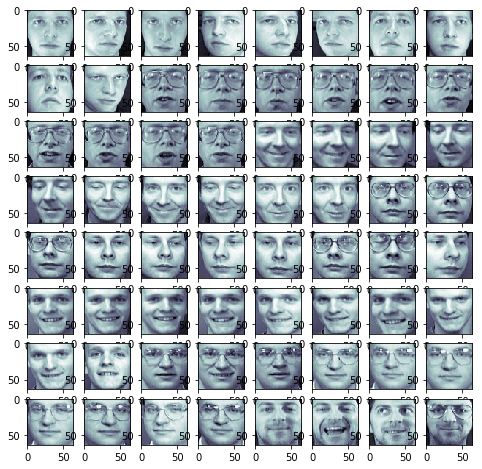

In [17]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(oli.images[i], cmap = plt.cm.bone)
plt.show()

In [21]:
oliv = oli
x = oliv.data
y = oliv.target
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.components_.shape

(400, 4096)

In [23]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/ total < 0.95:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k

123

In [27]:
pca = PCA(n_components = k, whiten = True)
transform_data = pca.fit_transform(x)
transform_data.shape

(400, 123)

In [29]:
x_approx = pca.inverse_transform(transform_data)
x_approx.shape

(400, 4096)

In [30]:
x_approx_images = x_approx.reshape((400,64,64))

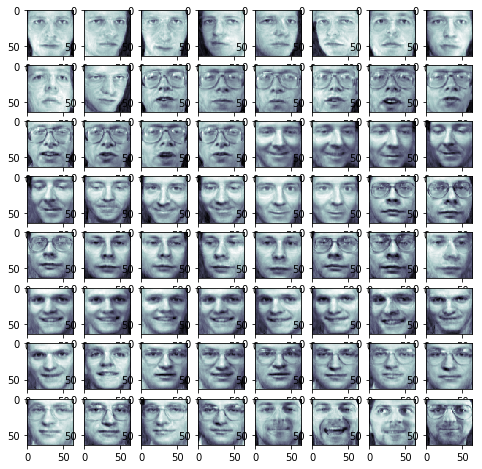

In [31]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [32]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [33]:
eigenfaces = eigenv.reshape((123, 64, 64))

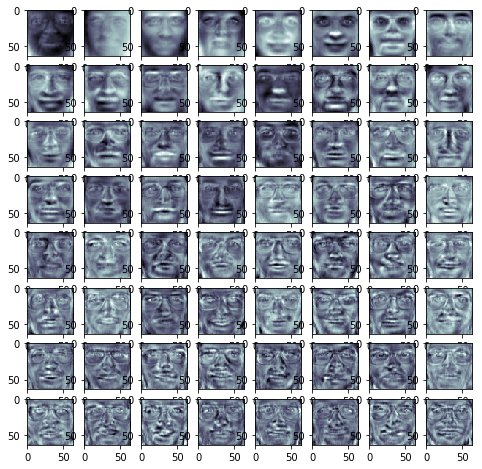

In [34]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()